# **Population Density in Dubai**

# Urban Evolution of Dubai - A Comparative Remote Sensing Analysis from 1995 to 2024

**Erik Ashkinadze (erik.ashkinadze@ruhr-uni-bochum.de)**

**Devon Klör (devon.kloer@ruhr-uni-bochum.de)**

**References:** Google Earth Engine Repositroy: GHSL: Global population surfaces 1975-2030 (P2023A) 

Schiavina M.; Freire S.; Carioli A.; MacManus K. (2023):
GHS-POP R2023A - GHS population grid multitemporal (1975-2030). European Commission, Joint Research Centre (JRC)
PID: http://data.europa.eu/89h/2ff68a52-5b5b-4a22-8f40-c41da8332cfe, doi:10.2905/2FF68A52-5B5B-4A22-8F40-C41DA8332CFE

Qiusheng Wu (o. J.): How to create timelapse animations using cartoee  https://geemap.org/notebooks/52_cartoee_gif/#create-timelapse-animations

GIF saved to c:\Users\dkloe\Downloads\Ashkinadze_Kloer_GIS1\GIS1_Codes\Ergebnisse\Population_Timelapse\dubai_population_animation.gif
MP4 saved to c:\Users\dkloe\Downloads\Ashkinadze_Kloer_GIS1\GIS1_Codes\Ergebnisse\Population_Timelapse\dubai_population_animation.mp4


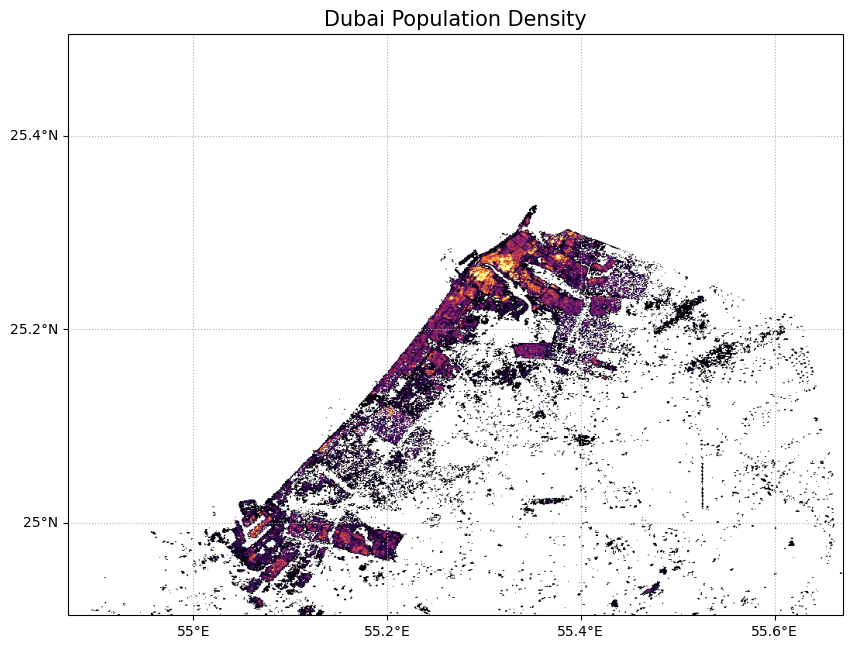

In [1]:
import ee
import geemap
import os
from geemap import cartoee
import matplotlib.pyplot as plt

# Initializing GEE
ee.Initialize(project='ee-dkloer01')

# Import the GHSL Population data 
image1995 = ee.Image('JRC/GHSL/P2023A/GHS_POP/1995')
image2005 = ee.Image('JRC/GHSL/P2023A/GHS_POP/2005')
image2015 = ee.Image('JRC/GHSL/P2023A/GHS_POP/2015')
image2025 = ee.Image('JRC/GHSL/P2023A/GHS_POP/2025')

# Visualisation for Population Density
population_count_vis = {
    'min': 0.0,
    'max': 100.0,
    'palette': ['000004', '320A5A', '781B6C', 'BB3654', 'EC6824', 'FBB41A', 'FCFFA4']
}

# import Dubai Shapefile
shapefile_path = "./Dubai_Shapes/Dubai.shp"
dubai = geemap.shp_to_ee(shapefile_path)

# extract Geometry from the FeatureCollection
dubai_geometry = dubai.geometry()

# clip to Duabi and use mask
image1995 = image1995.clip(dubai_geometry).updateMask(image1995.gt(0))
image2005 = image2005.clip(dubai_geometry).updateMask(image2005.gt(0))
image2015 = image2015.clip(dubai_geometry).updateMask(image2015.gt(0))
image2025 = image2025.clip(dubai_geometry).updateMask(image2025.gt(0))

# create an image collection
collection = ee.ImageCollection.fromImages([image1995, image2005, image2015, image2025])

# visualisation for the GIF
vis_params = population_count_vis

# region
lon, lat = 55.2708, 25.2048  # coordinates of Dubai
w, h = 0.4, 0.3
region = [lon + w, lat - h, lon - w, lat + h]

# create the GIF
cartoee.get_image_collection_gif(
    ee_ic=collection,
    out_dir=os.path.expanduser("./Ergebnisse/Population_Timelapse"),
    out_gif="dubai_population_animation.gif",
    vis_params=vis_params,
    region=region,
    fps=1,
    mp4=True,
    grid_interval=(0.2, 0.2),
    plot_title="Dubai Population Density",
    date_format="YYYY",
    fig_size=(10, 8),
    dpi_plot=100,
    file_format="png",
    verbose=True,
)

# create a map with the first image of the collection
image = ee.Image(collection.first())
fig = plt.figure(figsize=(10, 8))

# use cartoee to create a map
ax = cartoee.get_map(image, region=region, vis_params=vis_params)

# add a grid to the map
cartoee.add_gridlines(ax, interval=[0.2, 0.2], linestyle=":")

ax.set_title(label="Dubai Population Density", fontsize=15)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


# Visualisation for Population Density
population_count_vis = [
    '#000004', '#320A5A', '#781B6C', '#BB3654', '#EC6824', '#FBB41A', '#FCFFA4'
]

# Creating a custom colormap from the list of colors
cmap_population = LinearSegmentedColormap.from_list("my_population_cmap", population_count_vis)

fig, ax = plt.subplots(figsize=(6, 1.5), facecolor='black') # Höhe des Plots etwas vergrößert
gradient = np.linspace(-1, 1, 256).reshape(1, -1)
ax.imshow(gradient, aspect='auto', cmap=cmap_population)

# Re-enable axes
ax.set_axis_on()

# Set ticks and labels
ax.set_xticks([0, 255])
ax.set_xticklabels(['0', '100'], color='white')

ax.set_yticks([])
ax.set_yticklabels([])

# add header to the plot
ax.text(0.0, 1.2, 'Population per km²', color='white', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)

# Remove top, right, and left axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('white')

# This line sets the color of the x-axis tick marks to white
ax.tick_params(axis='x', colors='white')

plt.savefig("./Ergebnisse/legend_population.png", bbox_inches='tight', pad_inches=0)
plt.close()